In [1]:
import pandas as pd

# Load the uploaded diabetes dataset
file_path = 'diabetes2.csv'
df = pd.read_csv(file_path)

# Display dataset overview
df_head = df.head()
df_info = df.info()
df_description = df.describe()

df_head, df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952

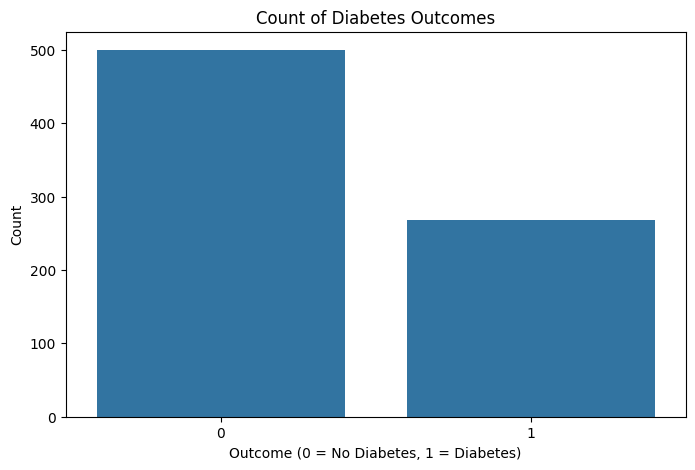

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of outcomes (diabetes vs no diabetes)
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df)
plt.title('Count of Diabetes Outcomes')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


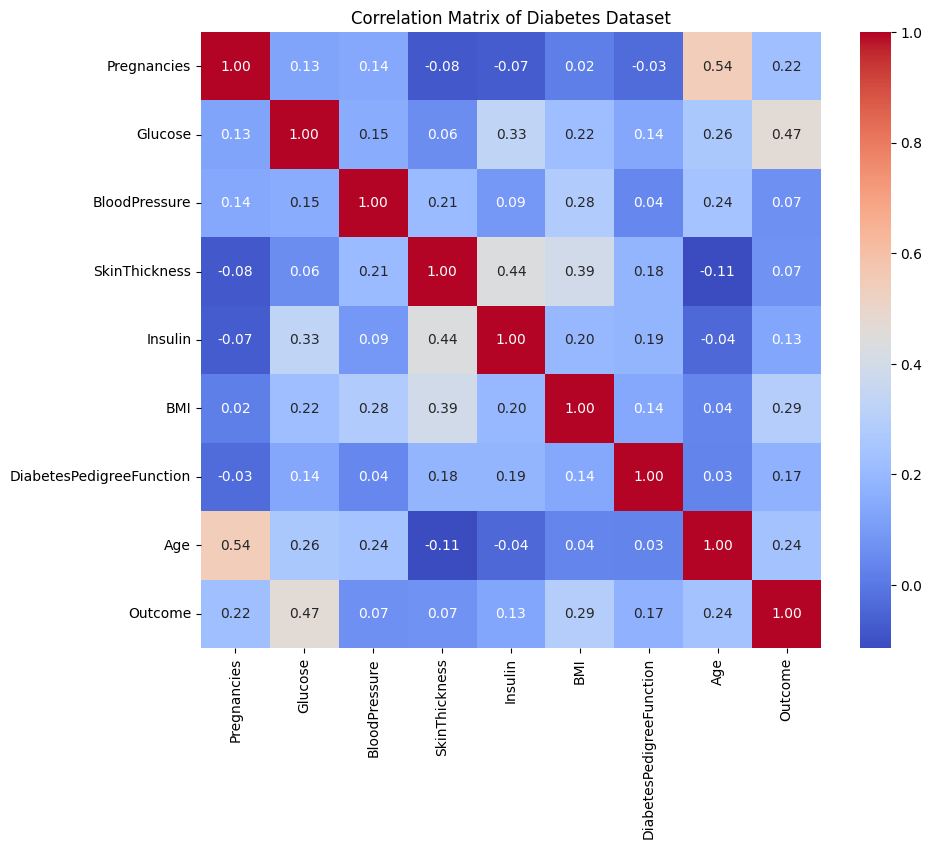

In [4]:
# Reload the dataset


# Compute and display the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()


In [5]:
# Sort correlations with 'Outcome' to identify strongest predictors
strongest_predictors = correlation_matrix['Outcome'].sort_values(ascending=False)

# Display strongest predictors
strongest_predictors


,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features and target
X = df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']]
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.7532467532467533,
 array([[81, 18],
        [20, 35]]),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.82      0.81        99\n           1       0.66      0.64      0.65        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.73      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

Optimize model with hyperparameter tuning.


In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the optimized model on the test set
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_conf_matrix = confusion_matrix(y_test, y_pred_optimized)
optimized_class_report = classification_report(y_test, y_pred_optimized)

best_params, best_score, optimized_accuracy, optimized_conf_matrix, optimized_class_report


Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

({'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'},
 0.7704118352658936,
 0.7532467532467533,
 array([[81, 18],
        [20, 35]]),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.82      0.81        99\n           1       0.66      0.64      0.65        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.73      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

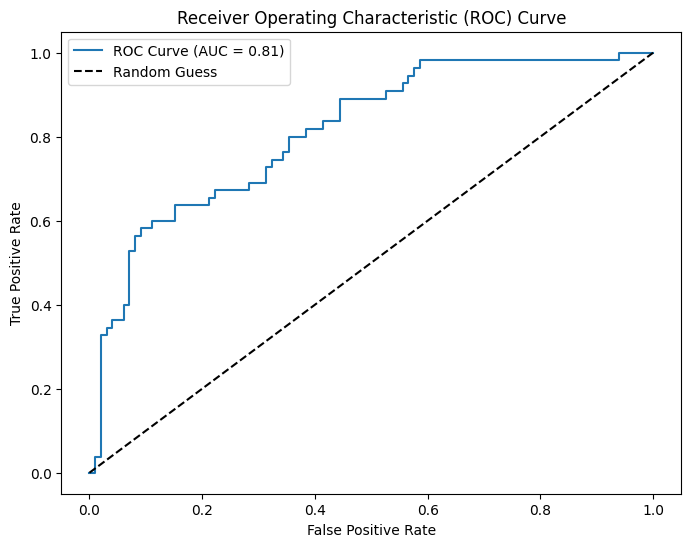

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities for ROC curve
y_prob = optimized_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
